In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect , desc, extract

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
engine.execute("Select * from Measurement Limit(5)").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
columns = inspector.get_columns("Station")
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute("Select * from Station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#calculate the last date:
last_date=session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(last_date)

('2017-08-23',)


In [15]:
# Calculate the date 1 year ago from the last data point in the database
last_year_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print(last_year_date)

2016-08-23


In [43]:
aa=dt.date(last_date[0])
print(aa)

TypeError: an integer is required (got type str)

In [16]:
# Perform a query to retrieve the data and precipitation scores
scores=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>=last_year_date).order_by(Measurement.date).all()
for score in scores:
    print(score)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

('2017-01-07', 0.06)
('2017-01-07', 0.0)
('2017-01-07', 0.0)
('2017-01-07', 0.0)
('2017-01-07', 0.0)
('2017-01-08', 0.0)
('2017-01-08', 0.0)
('2017-01-08', 0.03)
('2017-01-08', 0.0)
('2017-01-08', 0.0)
('2017-01-08', 0.03)
('2017-01-09', 0.0)
('2017-01-09', 0.0)
('2017-01-09', 0.0)
('2017-01-09', None)
('2017-01-09', 0.0)
('2017-01-09', 0.0)
('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-10', 0.0)
('2017-01-10', 0.0)
('2017-01-10', None)
('2017-01-10', 0.0)
('2017-01-10', 0.0)
('2017-01-10', 0.0)
('2017-01-11', 0.0)
('2017-01-11', 0.0)
('2017-01-11', 0.0)
('2017-01-11', None)
('2017-01-11', 0.0)
('2017-01-11', 0.0)
('2017-01-12', 0.0)
('2017-01-12', 0.0)
('2017-01-12', None)
('2017-01-12', None)
('2017-01-12', 0.0)
('2017-01-12', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-13', None)
('2017-01-13', None)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.01)
('2017-01-14', 0.0)
('2017-01-15', 0.0)
('2017-01

('2017-03-28', 0.68)
('2017-03-29', 0.0)
('2017-03-29', 0.0)
('2017-03-29', 0.03)
('2017-03-29', None)
('2017-03-29', 0.08)
('2017-03-29', 0.01)
('2017-03-29', 0.07)
('2017-03-30', 0.0)
('2017-03-30', 0.08)
('2017-03-30', 0.03)
('2017-03-30', None)
('2017-03-30', 0.0)
('2017-03-30', 0.04)
('2017-03-31', 0.0)
('2017-03-31', 0.0)
('2017-03-31', 0.0)
('2017-03-31', 0.0)
('2017-03-31', 0.0)
('2017-03-31', 0.01)
('2017-03-31', None)
('2017-04-01', 0.0)
('2017-04-01', 0.0)
('2017-04-01', 0.0)
('2017-04-01', 0.0)
('2017-04-01', 0.21)
('2017-04-01', 0.2)
('2017-04-02', 0.0)
('2017-04-02', 0.0)
('2017-04-02', 0.0)
('2017-04-02', 0.0)
('2017-04-02', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-03', 0.08)
('2017-04-03', 0.09)
('2017-04-03', None)
('2017-04-03', 0.0)
('2017-04-03', 0.26)
('2017-04-03', 0.23)
('2017-04-04', 0.0)
('2017-04-04', 0.04)
('2017-04-04', 0.0)
('2017-04-04', 0.0)
('2017-04-04', 0.0)
('2017-04-04', 0.09)
('2017-04-04', 0.02)
('2017-04-05', 0.0)
('2017-04-05', 0.04

('2017-06-18', 0.24)
('2017-06-18', 0.7)
('2017-06-19', 0.0)
('2017-06-19', 0.05)
('2017-06-19', 0.19)
('2017-06-19', None)
('2017-06-19', 0.01)
('2017-06-19', 0.08)
('2017-06-19', 0.4)
('2017-06-20', 0.02)
('2017-06-20', 0.05)
('2017-06-20', 0.17)
('2017-06-20', None)
('2017-06-20', 0.0)
('2017-06-20', 0.31)
('2017-06-21', 0.0)
('2017-06-21', 0.02)
('2017-06-21', None)
('2017-06-21', None)
('2017-06-21', 0.19)
('2017-06-21', 0.3)
('2017-06-22', 0.0)
('2017-06-22', 0.1)
('2017-06-22', 0.0)
('2017-06-22', 0.0)
('2017-06-22', 0.06)
('2017-06-22', 0.28)
('2017-06-23', 0.0)
('2017-06-23', 0.0)
('2017-06-23', None)
('2017-06-23', 0.0)
('2017-06-23', 0.05)
('2017-06-23', 0.12)
('2017-06-23', 0.5)
('2017-06-24', 0.06)
('2017-06-24', 0.0)
('2017-06-24', 0.0)
('2017-06-24', 0.36)
('2017-06-24', 0.22)
('2017-06-25', 0.0)
('2017-06-25', 0.08)
('2017-06-25', 0.0)
('2017-06-25', 0.02)
('2017-06-25', 0.5)
('2017-06-26', 0.0)
('2017-06-26', 0.02)
('2017-06-26', None)
('2017-06-26', None)
('2017-06-26

# Exploratory Climate Analysis

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df_scores=pd.DataFrame(scores)
df_scores.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


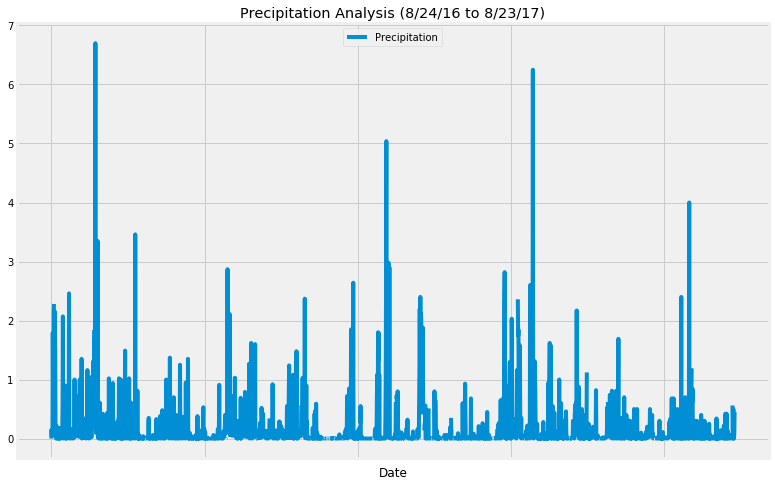

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
df_scores.plot('date', 'prcp',label="Precipitation",figsize=(12,8))
plt.xlabel("Date")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(loc="upper center")
plt.show()

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_scores.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
total_stations=session.query(Measurement.station).group_by(Measurement.station).count()
print(f"Total number of stations are : {total_stations}")

Total number of stations are : 9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by(desc(func.count(Measurement.id))).all()
for a in active_stations:
    print(a)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
busy_station=active_stations[0][0]
active_station=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station==busy_station).all()
print(active_station)

[(54.0, 85.0, 71.66378066378067)]


Text(0.5,1,'Station Analysis (8/24/16 to 8/23/17) for Station USC00519281')

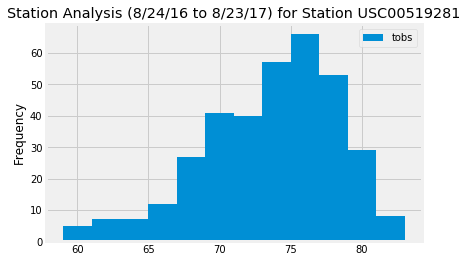

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp=session.query(Measurement.tobs).\
    filter(Measurement.date>=last_year_date,Measurement.station==busy_station).all()
dt_temp=pd.DataFrame(temp)
dt_temp.head(10)
plt.hist(dt_temp.tobs,12,label="tobs")
plt.ylabel("Frequency")
plt.legend()
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busy_station)


![precipitation](Images/station-histogram.png)

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [57]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start="2017-01-01"
trip_end=dt.date(2017,1,1)+dt.timedelta(days=7)
trip_temp=calc_temps(trip_start,trip_end)
print(trip_temp)

[(60.0, 68.27659574468085, 74.0)]


Text(0.5,1,'Trip Avg Temp')

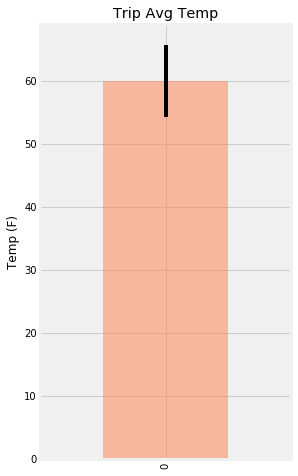

In [69]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_df=pd.DataFrame(trip_temp,columns=["avgt","mint","maxt"])
avgt=avg_df['avgt']
mint=avg_df['mint']
maxt=avg_df['maxt']
err=maxt-mint
avgt.plot(kind='bar',yerr=err,figsize=(4,8),color='coral',alpha=0.5)
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')

In [74]:
rain_desc=session.query(Measurement.prcp,Measurement.station).\
    filter(Measurement.date>=trip_start,Measurement.date<=trip_end).\
    order_by(desc(Measurement.prcp)).group_by(Measurement.station).all()
print(rain_desc)

[(0.03, 'USC00514830'), (0.03, 'USC00516128'), (0.0, 'USC00513117'), (0.0, 'USC00519281'), (0.0, 'USC00519397'), (0.0, 'USC00519523')]


In [78]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
vacation_data=session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.avg(Measurement.prcp)).\
    filter(Measurement.station==Station.station).\
    filter(Measurement.date >= trip_start).\
    filter(Measurement.date <= trip_end).\
    group_by(Measurement.station).\
    order_by(desc(func.avg(Measurement.prcp))).all()
for v in vacation_data:
    print(v)

('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.122)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.07875)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.07875)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.04375)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.025)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)


## Optional Challenge Assignment

In [79]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [81]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]

# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings


dates=[]
base = dt.datetime.strptime(trip_start, "%Y-%m-%d")
date_list = [base + dt.timedelta(days=x) for x in range(0,7)]
for date in date_list:
    dates.append(date.strftime("%m-%d"))
print(dates)

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in dates:
    r=daily_normals(date)
    normals.append(r)
print(normals)

['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07']
[[(62.0, 69.15384615384616, 77.0)], [(60.0, 69.39622641509433, 77.0)], [(62.0, 68.9090909090909, 77.0)], [(58.0, 70.0, 76.0)], [(56.0, 67.96428571428571, 76.0)], [(61.0, 68.96491228070175, 76.0)], [(57.0, 68.54385964912281, 76.0)]]


In [82]:
tmin,tmax,tavg=[],[],[]
for x in normals:
    for y in x:
        tmin.append([y][0][0])
print(tmin)
for x in normals:
    for y in x:
        tmax.append([y][0][2])
print(tmax)  
for x in normals:
    for y in x:
        tavg.append([y][0][1])
print(tavg)

[62.0, 60.0, 62.0, 58.0, 56.0, 61.0, 57.0]
[77.0, 77.0, 77.0, 76.0, 76.0, 76.0, 76.0]
[69.15384615384616, 69.39622641509433, 68.9090909090909, 70.0, 67.96428571428571, 68.96491228070175, 68.54385964912281]


In [83]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df=pd.DataFrame({'Date':dates,'tmin':tmin,'tavg':tavg,'tmax':tmax})
normals_df

,Date,tmin,tavg,tmax
0,01-01,62.0,69.153846,77.0
1,01-02,60.0,69.396226,77.0
2,01-03,62.0,68.909091,77.0
3,01-04,58.0,70.000000,76.0
4,01-05,56.0,67.964286,76.0
5,01-06,61.0,68.964912,76.0
6,01-07,57.0,68.543860,76.0


Text(0.5,0,'Date')

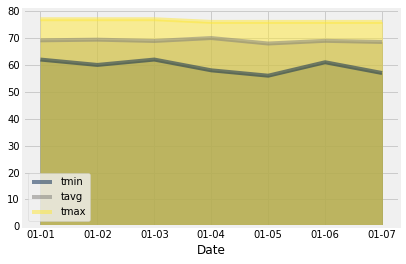

In [84]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot(kind='area', stacked=False, alpha=0.5, colormap='cividis')
[ax.legend(('tmin','tavg','tmax'),
           loc='lower left') for ax in plt.gcf().axes]
xticklabels=(dates)
plt.xticks(np.arange(7), (xticklabels))
plt.xlabel("Date")